## Pothole Detection

#### Load important libraries

In [1]:
import cv2
import numpy as np
import pygame
import time
import smtplib
from matplotlib import pyplot as plt

In [2]:
# Show the image
# Open a new thread to manage the external cv2 interaction
cv2.startWindowThread()
def plt_show(image, title=""):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.title(title)
#     plt.imshow(image, cmap="Greys_r")
#     plt.imshow(image, cmap=plt.cm.Spectral)
    plt.imshow(image, cmap=plt.cm.Greys_r)
    plt.show()

#### Resize the image

In [3]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized


In [4]:
r_image1 = cv2.imread('Pothole.jpg')
r_image2 = image_resize(r_image1, width = 275, height = 180)

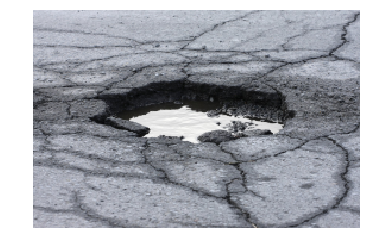

In [5]:
plt_show(r_image2)

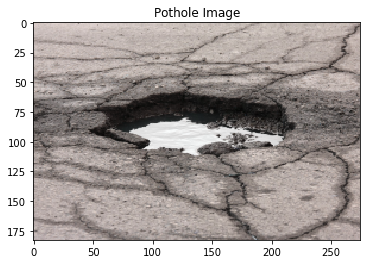

In [6]:
plt.title("Pothole Image")
plt.imshow(r_image2)
plt.show()
#resize_image = cv2.resize(r_image1, (275,180))
#plt_show(resize_image)

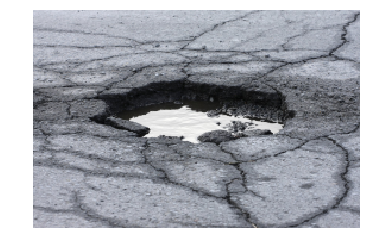

In [7]:
#im = cv2.imread('index4.jpg')
im = r_image2
plt_show(im)

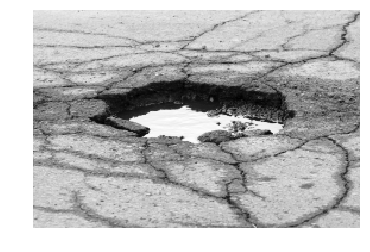

In [8]:
# Convert the GrayScale
gray1 = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt_show(gray1)

In [9]:
# save the image
cv2.imwrite('grayImg.jpg', gray1)

True

#### Contour Detection Code

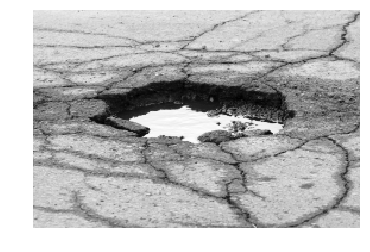

In [10]:
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
plt_show(imgray)

In [11]:
ret,thresh = cv2.threshold(imgray,127,255,0)

In [12]:
#contours1, _, a = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
image1, contours1, hierarchy1 = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

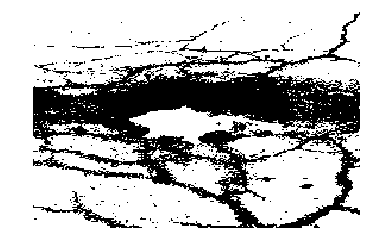

In [13]:
plt_show(image1)

In [14]:
#print(contours1)
#contours1.shape
# plt.title("Pothole Image")
# plt.imshow(image1)
# plt.show()

In [15]:
image2, contours2, hierarchy2 = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

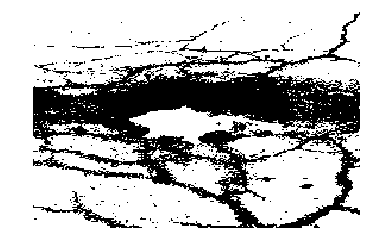

In [16]:
plt_show(image2)

In [17]:
# copy the real image
img2 = im.copy()

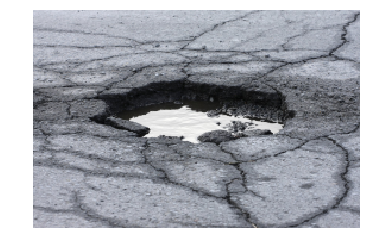

In [18]:
plt_show(img2)

In [19]:
out = cv2.drawContours(img2, contours2, -1, (0,250,0),1)

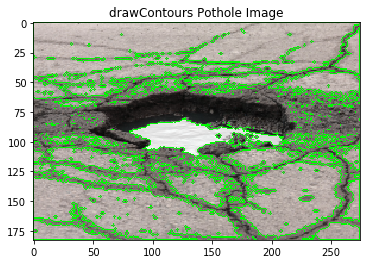

In [20]:
plt.title("drawContours Pothole Image")
plt.imshow(out)
plt.show()

#### Detec the pothole

In [21]:
cv2.imshow('img1',img2)
cv2.waitKey(0)
plt.subplot(331),plt.imshow(im),plt.title('GRAY')
plt.xticks([]), plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

In [22]:
img = cv2.imread('index2.jpg',0)

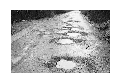

In [23]:
plt_show(img)

In [24]:
ret,thresh = cv2.threshold(img,127,255,0)

In [25]:
image, contours, hierarchy = cv2.findContours(thresh, 1, 2)

In [26]:
cnt = contours[0]
M = cv2.moments(cnt)
print(M)

{'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}


In [27]:
perimeter = cv2.arcLength(cnt,True)
print (perimeter)

0.0


In [28]:
area = cv2.contourArea(cnt)
print (area)

0.0


In [29]:
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
print (epsilon)
print (approx)

0.0
[[[264 179]]]


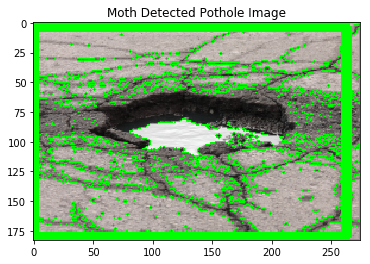

In [30]:
for c in contours:
    rect = cv2.boundingRect(c)
    if rect[2] < 100 or rect[3] < 100: continue
    #print cv2.contourArea(c)
    x,y,w,h = rect
    cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),8)
    cv2.putText(img2,'Moth Detected',(x+w+40,y+h),0,2.0,(0,255,0))
    
    plt.title("Moth Detected Pothole Image")
    plt.imshow(img2)
    plt.show()
    
cv2.imshow("Show",img2)
#cv2.imshow('img' , resize_img)
x = cv2.waitKey(0)
if x == 27:
    cv2.destroyWindow('img')
cv2.waitKey()  
cv2.destroyAllWindows()

In [31]:
k = cv2.isContourConvex(cnt)
print(k)

False


In [32]:
#blur
blur = cv2.blur(im,(5,5))

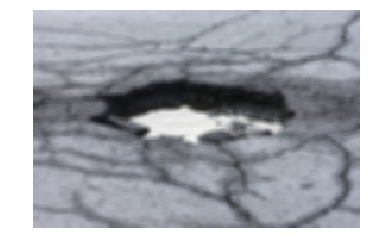

In [33]:
plt_show(blur)

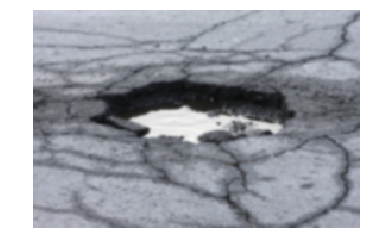

In [34]:
#guassian blur 
gblur = cv2.GaussianBlur(im,(5,5),0)
plt_show(gblur)

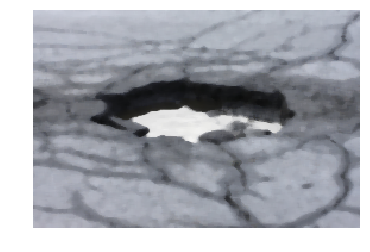

In [35]:
#median 
median = cv2.medianBlur(im,5)
plt_show(median)

In [36]:
#erosion
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(median,kernel,iterations = 1)

In [37]:
dilation = cv2.dilate(erosion,kernel,iterations = 5)

In [38]:
#erosion followed dilation
closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)

In [39]:
#canny edge detection
edges = cv2.Canny(dilation,9,220)  

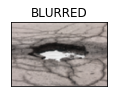

In [40]:
#plotting using matplotlib
plt.subplot(332),plt.imshow(blur),plt.title('BLURRED')
plt.xticks([]), plt.yticks([])
plt.show()

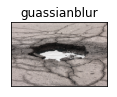

In [41]:
plt.subplot(333),plt.imshow(gblur),plt.title('guassianblur')
plt.xticks([]), plt.yticks([])  
plt.show()

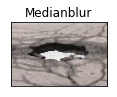

In [42]:
plt.subplot(334),plt.imshow(median),plt.title('Medianblur')
plt.xticks([]), plt.yticks([]) 
plt.show()

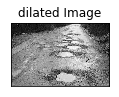

In [43]:
plt.subplot(337),plt.imshow(img,cmap = 'gray')
plt.title('dilated Image'), plt.xticks([]), plt.yticks([])
plt.show()

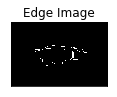

In [44]:
plt.subplot(338),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

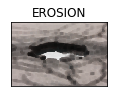

In [45]:
plt.subplot(335),plt.imshow(erosion),plt.title('EROSION')
plt.xticks([]), plt.yticks([])
plt.show()

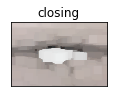

In [46]:
plt.subplot(336),plt.imshow(closing),plt.title('closing')
plt.xticks([]), plt.yticks([])
plt.show()


#### Plot all images

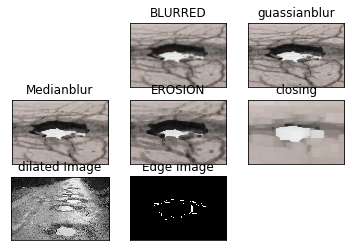

In [47]:
#plotting using matplotlib
plt.subplot(332),plt.imshow(blur),plt.title('BLURRED')
plt.xticks([]), plt.yticks([])
plt.subplot(333),plt.imshow(gblur),plt.title('guassianblur')
plt.xticks([]), plt.yticks([])        
plt.subplot(334),plt.imshow(median),plt.title('Medianblur')
plt.xticks([]), plt.yticks([]) 
plt.subplot(337),plt.imshow(img,cmap = 'gray')
plt.title('dilated Image'), plt.xticks([]), plt.yticks([])
plt.subplot(338),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(335),plt.imshow(erosion),plt.title('EROSION')
plt.xticks([]), plt.yticks([])
plt.subplot(336),plt.imshow(closing),plt.title('closing')
plt.xticks([]), plt.yticks([])
plt.show()

#### alerting the driver

In [48]:
pygame.init()
pygame.mixer.music.load("buzz.mp3")
pygame.mixer.music.play()
time.sleep(5)

# End of Pothhole Detection Project